In [38]:
import numpy as np
from sklearn.datasets import fetch_openml 
import matplotlib.pyplot as plt
from collections import defaultdict

In [41]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
X = X[:2000]

print(X.shape)

(2000, 784)


In [52]:
def my_kmeans(data,K,M):
    num_points = len(data)
    data = np.asarray(data)
    
    final_clusters = []
    final_centroids = []
    losses = []
    final_losses = []
    
    MSEs = []
    
    
    for i in range(M):
        class_list = np.zeros(num_points)
        inits = np.random.choice(2000, K, replace=False)
        
        centroids = np.asarray([data[index] for index in inits])

        loss = []
        
        while True:
            for j in range(num_points):
                distances = np.linalg.norm(data[j]-centroids, axis=1)
                cluster = np.argmin(distances)
                class_list[j] = cluster
            test = np.copy(centroids)
            loss_value = 0
                
            for j in range(K):
                cluster_points = []
                for m in range(num_points):
                    if class_list[m] == j:
                        cluster_points.append(data[m])
                centroids[j] = np.mean(cluster_points, axis=0)
                for item in cluster_points:
                    loss_value += np.linalg.norm(item-centroids[j])
            loss_value = loss_value / num_points
            loss.append(loss_value)
            if np.all(np.equal(test, centroids)):
                break
                            
        MSEs.append(loss_value)
        final_centroids.append(centroids)
        final_clusters.append(cluster_points)
        losses.append(loss)
        final_losses.append(loss[-1])
        
        plt.plot(loss)
        plt.title("Iteration: {}".format(i+1))
        plt.xlabel("K-value")
        plt.ylabel("Loss")
        plt.show()
        
    x = []
    for iteration in range(M):
        x.append(iteration)
    plt.plot(x, MSEs)    
    plt.title("MSE Values over M Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.show()
    
    min_index = final_losses.index(min(final_losses))
    best_values = [final_centroids[min_index], final_clusters[min_index], losses[min_index], final_losses]
    return best_values      

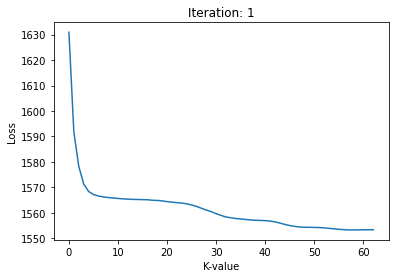

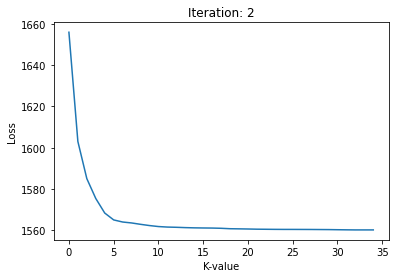

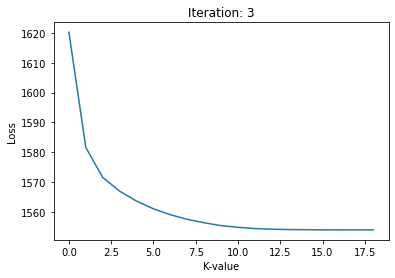

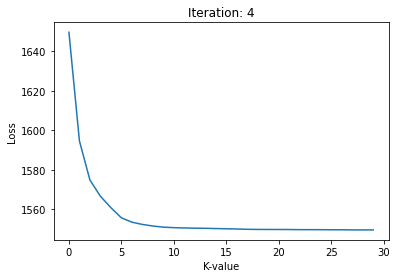

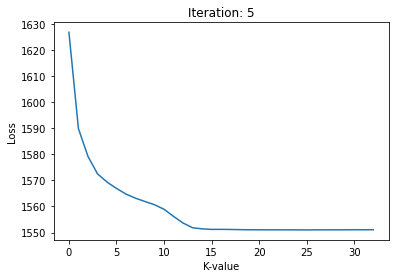

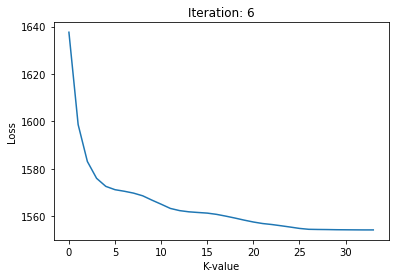

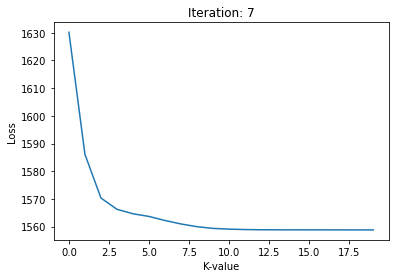

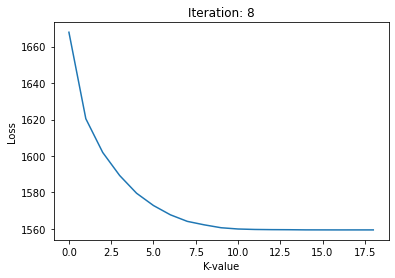

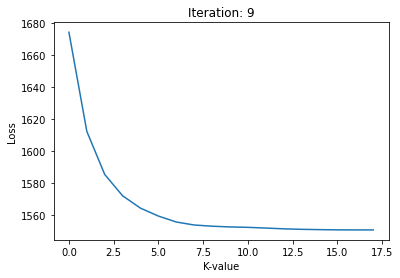

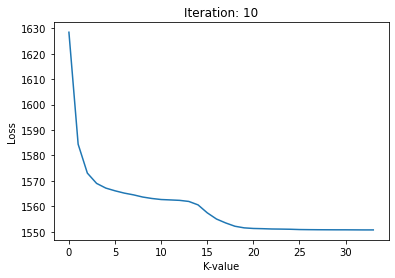

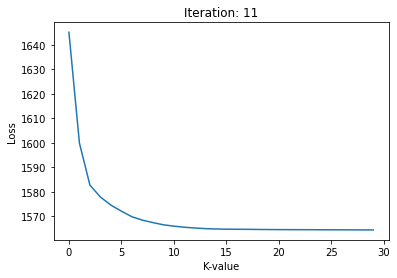

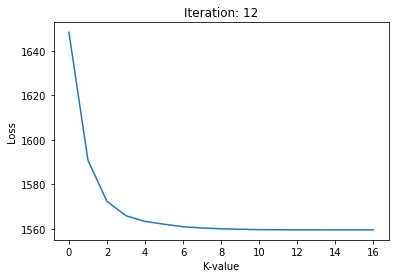

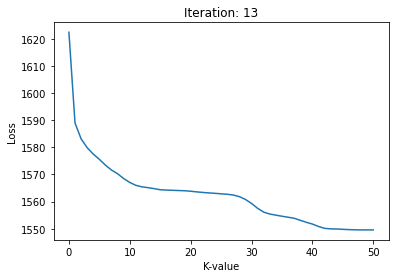

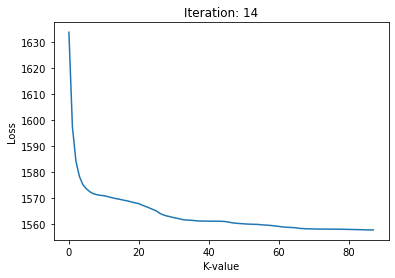

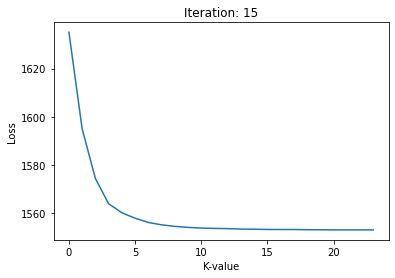

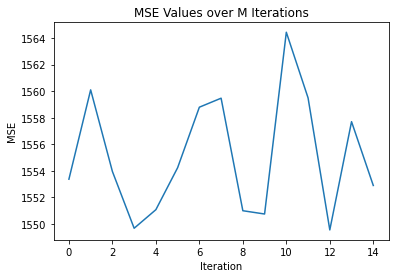

In [54]:
K = 10
M = 15
results = []
results = my_kmeans(X,K,M)
